In [1]:
"""repeat SRM on [data] and [data+small_perturbation] yield similar {W,S} set"""

from brainiak.funcalign.srm import SRM
import numpy as np 

import matplotlib.pyplot as plt 
import hypertools as hyp 

import logging

np.random.seed(0)

%autosave 5 

Autosaving every 5 seconds


In [2]:
def get_ortho_matrix(V): 
    Q, _ = np.linalg.qr(np.random.normal(size=(V,V)))
    return Q

# Q = get_ortho_matrix(V)
# Q.T @ Q
# Q @ Q.T

def transpose_matrix_list(matrix_list): 
    return [m.T for m in matrix_list]


def gen_simulated_data(n_subjects, V, T, noise_level):
    # make subject 1 
    X = np.random.normal(size=(V,T))
    
    # multi-subject data 
    data = [X]
    # create additional subjects based on subject 1 
    for _ in range(n_subjects-1): 
        # rotation 
        Q = get_ortho_matrix(V)
        X_new = Q @ X 
        
        # append 
        noise = np.random.normal(size=(V,T)) * noise_level
        data.append(X_new + noise)
    return data 

In [3]:
"""gen data"""
# constants 
V = 3
T = 20
n_subjects = 2
noise_level = 0.2

data = gen_simulated_data(n_subjects, V, T, noise_level)

print(np.shape(data))

(2, 3, 20)


In [4]:
%matplotlib notebook  

In [5]:
# hyp.plot(
#     transpose_matrix_list(data), 
# #     animate='spin', frame_rate=60, rotations=1,
#     size=(5, 3)
# )

In [6]:
"""align"""

n_components = V

# fit SRM 
srm = SRM(features=n_components)
data_srm = srm.fit_transform(data)

# form perturbed data
perturbation_level = 1e-1
tiny_perturbation = np.random.normal(size=np.shape(data)) * perturbation_level
data_perturbed = data + tiny_perturbation

# fit SRM again 
srm_perturbed = SRM(features=n_components)
data_perturbed_srm = srm_perturbed.fit_transform(data_perturbed)

# 
print(np.shape(data_srm))
print(np.shape(data_perturbed_srm))

(2, 3, 20)
(2, 3, 20)


In [7]:
print(srm.w_)
print(srm_perturbed.w_)

[array([[-0.08929445,  0.95579523, -0.28014637],
       [-0.98566519, -0.04437591,  0.16277256],
       [ 0.14314549,  0.29066521,  0.94605661]]), array([[-0.76687588, -0.16122946,  0.62121368],
       [-0.20254395, -0.85766676, -0.47263483],
       [ 0.60899698, -0.48827533,  0.6250679 ]])]
[array([[-0.0785067 ,  0.95157764, -0.29721489],
       [-0.98925717, -0.0374822 ,  0.14129877],
       [ 0.12331649,  0.30511486,  0.9442976 ]]), array([[-0.7702113 , -0.15442138,  0.61881225],
       [-0.20620712, -0.85784249, -0.47072804],
       [ 0.60353391, -0.49016355,  0.62887719]])]


<IPython.core.display.Javascript object>


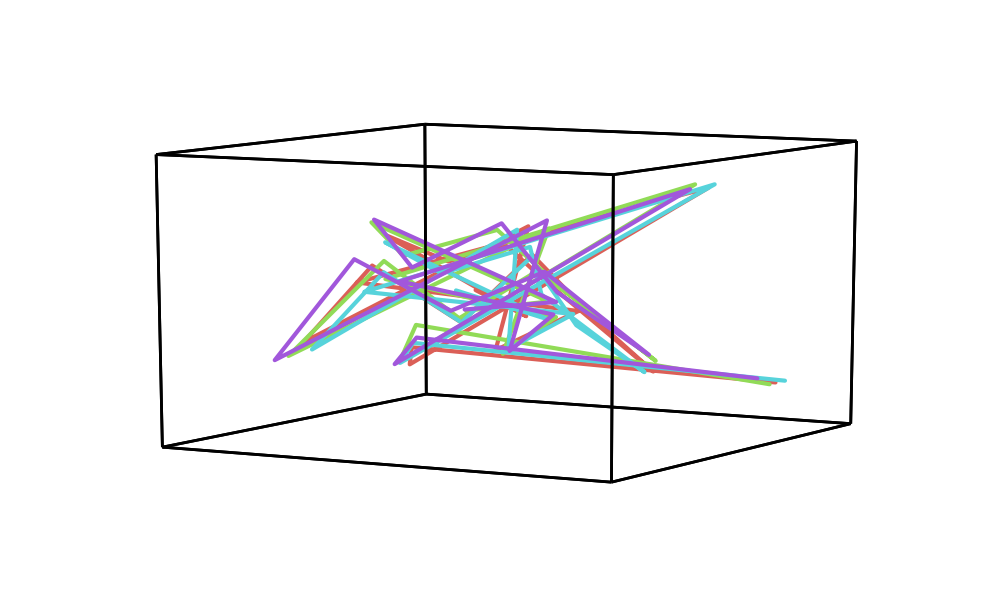

In [8]:
hyp.plot(
    transpose_matrix_list(np.vstack([data_srm, data_perturbed_srm])), 
#     animate='spin', frame_rate=60, rotations=1,
    size=(5, 3)
)

In [9]:
# hyp.plot(
#     transpose_matrix_list(data_srm), 
# #     animate='spin', frame_rate=60, rotations=1,
#     size=(5, 3)
# )

In [10]:
# hyp.plot(
#     transpose_matrix_list(data_perturbed_srm), 
# #     animate='spin', frame_rate=60, rotations=1,
#     size=(5, 3)
# )